# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1033.
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           3.40e-42
Time:                        23:07:52   Log-Likelihood:                 4.6372
No. Observations:                  50   AIC:                            -1.274
Df Residuals:                      46   BIC:                             6.374
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1522      0.078     65.742      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.74656292  5.15016459  5.52347324  5.8456905   6.10352405  6.29337145
  6.42191206  6.50500961  6.56510583  6.62753338  6.7163537   6.85040385
  7.04020157  7.2862173   7.57879687  7.89974763  8.22532749  8.53014564
  8.79133421  8.99230541  9.12547681  9.19351717  9.20890792  9.19189253
  9.16715054  9.15974282  9.19099409  9.27498936  9.41625979  9.60903826
  9.83820685 10.08178071 10.31452006 10.51207708 10.65499614 10.7319103
 10.74140893 10.69226937 10.60201494 10.49403583 10.39374622 10.32440875
 10.30331257 10.33893276 10.42953792 10.5634746  10.72108196 10.877922
 11.0087946  11.09187788]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.10751632 11.02190326 10.85000467 10.62592614 10.39456259 10.20060647
 10.07760546 10.03974887 10.07839355 10.16418007]


## Plot comparison

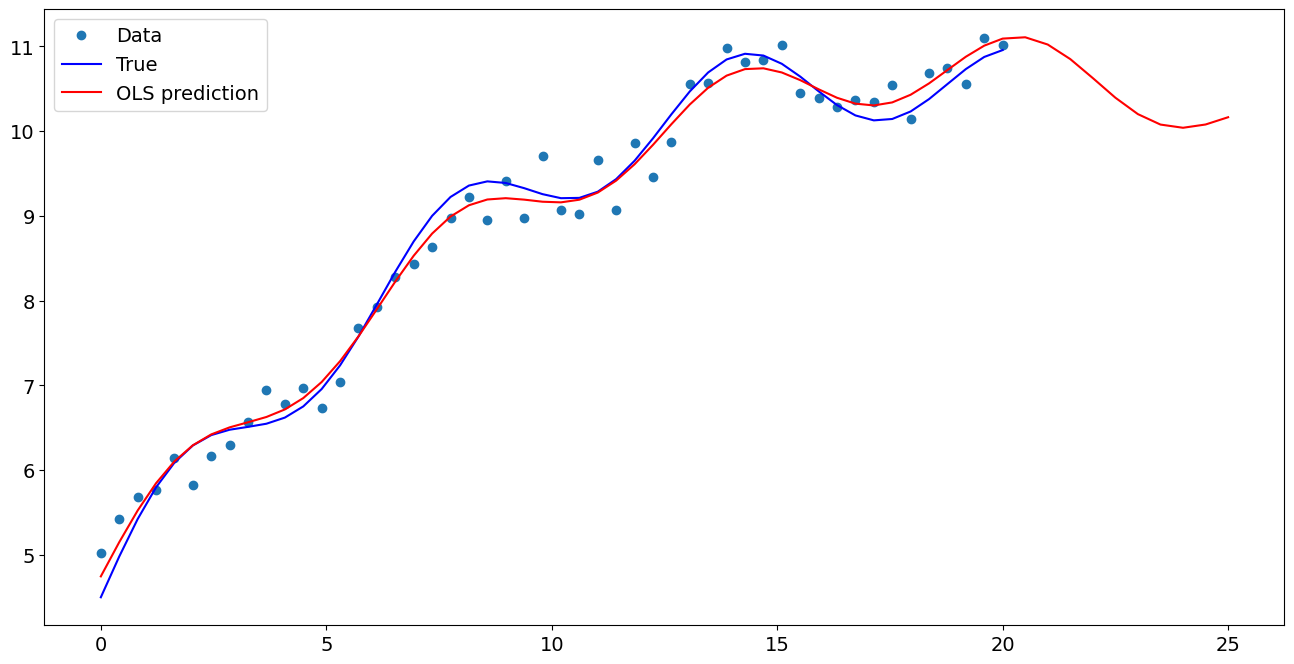

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.152165
x1                  0.462086
np.sin(x1)          0.381627
I((x1 - 5) ** 2)   -0.016224
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.107516
1    11.021903
2    10.850005
3    10.625926
4    10.394563
5    10.200606
6    10.077605
7    10.039749
8    10.078394
9    10.164180
dtype: float64